# Import Libraries

In [130]:
import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import DataFrame

In [131]:
df = pd.read_csv('data/Salary_multiple.csv')

# Preprocessing

In [132]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


In [133]:
encoder = LabelEncoder()
df['Field'] = encoder.fit_transform(df['Field'])

In [134]:
df.head()

,YearsExperience,Field,Salary
0,1.1,1,39343.0
1,1.3,0,26205.0
2,1.5,1,37731.0
3,2.0,0,28525.0
4,2.2,1,39891.0


In [135]:
scaler = StandardScaler()
df[['YearsExperience', 'Salary']] = scaler.fit_transform(df[['YearsExperience', 'Salary']])

# Split to X and Y

In [136]:
X = df[['YearsExperience']].values
y = df['Salary']

In [137]:
X=X.reshape(-1,1)

# Split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Build Model

In [139]:
# Build the neural network model
model = Sequential([
    Dense(4, activation='linear', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid'),
    # Dense(1, activation='linear')  # No activation function for output layer (regression problem)
])

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile

In [141]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error',metrics=['accuracy'])

In [142]:
len(X_train)

24

# Tensorboard

In [143]:
# log_dir = "logs/regression_tf/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/regression_tf/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [144]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8 , validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/50
3/3 [==============================] - 1s 205ms/step - loss: 1.1095 - accuracy: 0.0000e+00 - val_loss: 0.8703 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 92ms/step - loss: 1.1066 - accuracy: 0.0000e+00 - val_loss: 0.8687 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 91ms/step - loss: 1.1037 - accuracy: 0.0000e+00 - val_loss: 0.8670 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 91ms/step - loss: 1.1009 - accuracy: 0.0000e+00 - val_loss: 0.8654 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 91ms/step - loss: 1.0979 - accuracy: 0.0000e+00 - val_loss: 0.8637 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 112ms/step - loss: 1.0951 - accuracy: 0.0000e+00 - val_loss: 0.8621 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 113ms/step - loss: 1.0921 - accuracy: 0.0000e+00 - val_loss: 0.

In [145]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 63ms/step


In [146]:
len(y_pred)

30

# Prediction

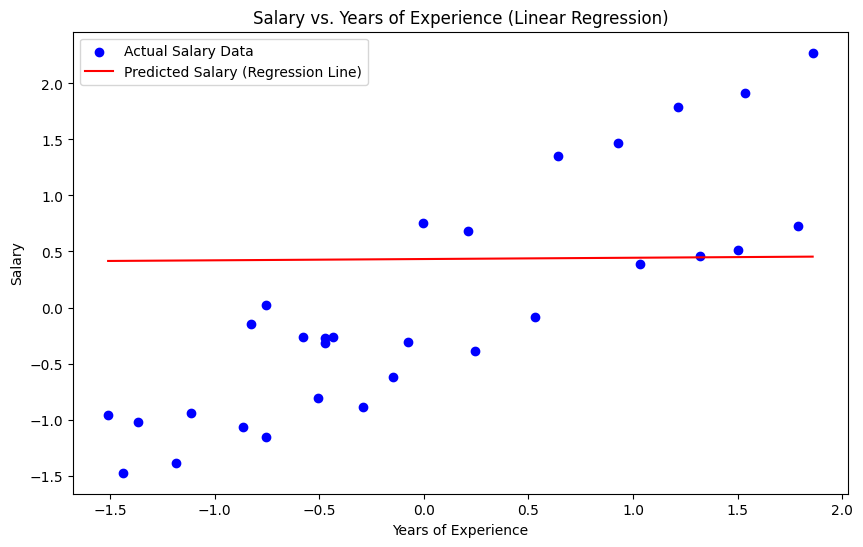

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Salary Data")
plt.plot(X, y_pred, color="red", label="Predicted Salary (Regression Line)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Years of Experience (Linear Regression)")
plt.legend()
plt.show()

# Get training Weights

In [148]:
model.layers[0].get_weights()

[array([[-0.7870856 ,  0.3254503 ,  0.16663443,  0.19832253]],
       dtype=float32),
 array([-0.01128397, -0.08101228,  0.04775666,  0.09877315], dtype=float32)]

In [149]:
for layers in model.layers:
    print(layers.get_weights())

[array([[-0.7870856 ,  0.3254503 ,  0.16663443,  0.19832253]],
      dtype=float32), array([-0.01128397, -0.08101228,  0.04775666,  0.09877315], dtype=float32)]
[array([[-0.03638111],
       [ 0.67674583],
       [-0.3426787 ],
       [-0.73171234]], dtype=float32), array([-0.1280578], dtype=float32)]


# Evaluate the model

In [150]:

loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

1/1 [==============================] - 0s 31ms/step - loss: 0.8047 - accuracy: 0.0000e+00
Test Loss: [0.8046658635139465, 0.0]


# Metrics

In [151]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


# Evaluate

In [152]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

In [153]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is :", r_squared)

The R2 error is : -0.03645413820934729


In [154]:
mean_absolute_error(y_test,y_pred)

0.8046659420271642

In [155]:
mean_squared_error(y_test,y_pred)

1.0444943098887303

# Visualize

In [156]:
from tensorflow.keras.models import Model

# Activation from Each Layer

In [157]:
def get_activations(model, layer_name, X):
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(X, verbose=False)
    print(activations)
    return activations


In [158]:
def plot_activations(layer_name, activations):
    print(f"Layer: {layer_name}")
    print(f"Activation Shape: {activations.shape}")

    if len(activations.shape) == 2:
        # 2D activations (Dense layers)
        plt.figure(figsize=(10, 5))
        plt.bar(range(activations.shape[1]), activations[0], color='skyblue')
        plt.title(f'Activations of {layer_name}')
        plt.xlabel('Neurons')
        plt.ylabel('Activation')
        plt.grid(True)
        plt.show()
    
    elif len(activations.shape) == 3:
        # 3D activations (Convolutional layers)
        num_channels = activations.shape[-1]
        for i in range(num_channels):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, :, :, i], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Channel {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    elif len(activations.shape) == 4:
        # 4D activations (Batches of 3D data, e.g., convolutional layers)
        num_samples = activations.shape[1]
        for i in range(num_samples):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, i, :, :], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Sample {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    else:
        print(f"Activation shape {activations.shape} not supported for visualization")

[[-0.5152855   0.12738621  0.15445918  0.22576678]]
Layer: dense_8
Activation Shape: (1, 4)


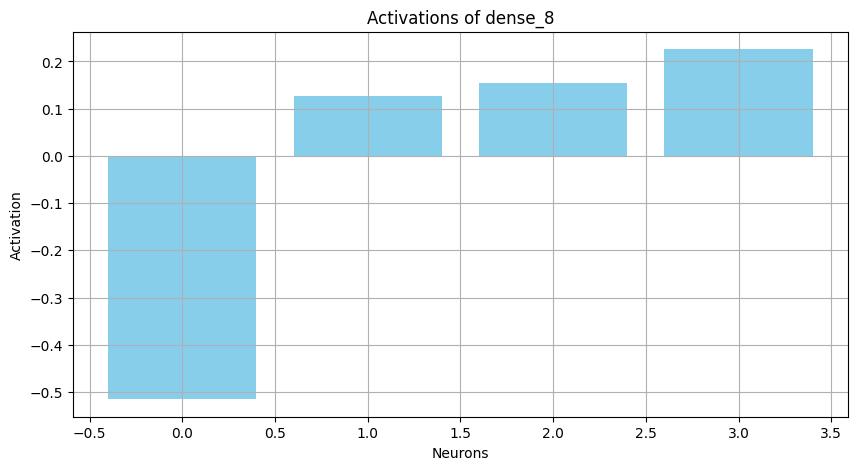

[[0.43998343]]
Layer: dense_9
Activation Shape: (1, 1)


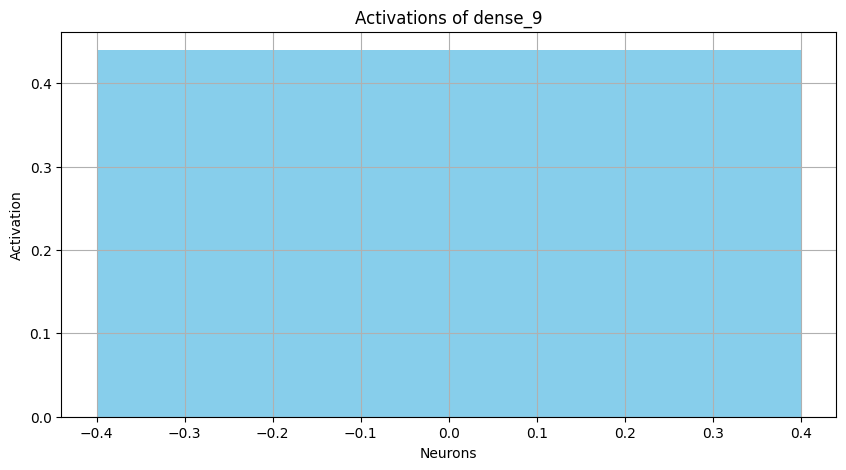

In [159]:
layer_names = [layer.name for layer in model.layers]

X_sample = X_train[23]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)

[[ 0.35919476 -0.23420072 -0.03067764  0.00542336]]
Layer: dense_8
Activation Shape: (1, 4)


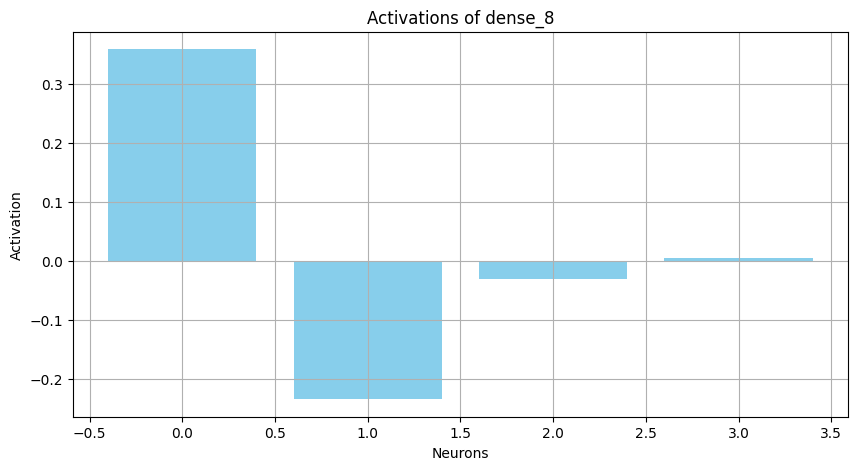

[[0.42725104]]
Layer: dense_9
Activation Shape: (1, 1)


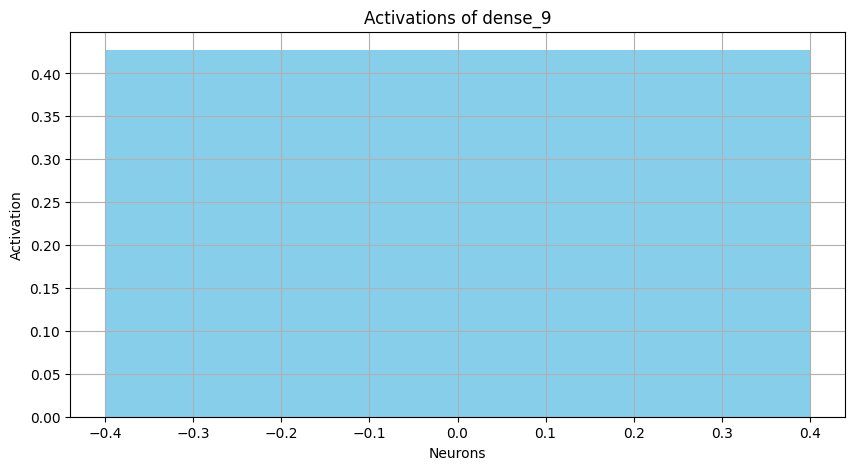

In [160]:
layer_names = [layer.name for layer in model.layers]

X_sample = X_train[11]
X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)